# Support Vector Machine Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [3]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [4]:
data.groupby(['Admitted']).mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [14]:
admit = len(data[data['Admitted'] == 1])
print('Admitted students number: ', admit)
print('Admitted percentage: ', admit/len(data))
print('Not Admitted students number: ', len(data)-admit)
print('Not Admitted percentage: ', (len(data)-admit)/len(data))

Admitted students number:  247
Admitted percentage:  0.6175
Not Admitted students number:  153
Not Admitted percentage:  0.3825


### What percent of students with research experience were admitted?

In [52]:
research_admit = len(data[(data['Admitted'] == 1) & (data['Research'] == 1)])
research_total = len(data[data['Research'] == 1])
print('P(admitted|research): ',research_admit/research_total)
print(research_admit)

P(admitted|research):  0.8264840182648402
181


### What percent of students admitted had research experience?

In [26]:
print('P(research|admitted): ', research_admit/admit)

P(research|admitted):  0.7327935222672065


### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

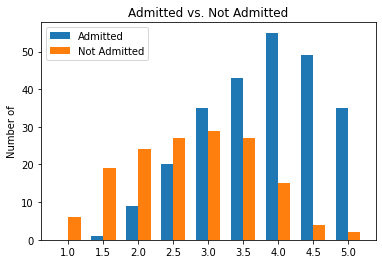

In [41]:
sop = data['SOP'].unique()
sop.sort()
admitted = []
not_adm = []

for x in sop:
  admitted.append(len(data[(data['SOP'] == x) & (data['Admitted'] == 1)]))
  not_adm.append(len(data[(data['SOP'] == x) & (data['Admitted'] == 0)]))

N = len(sop)
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)

rect1 = ax.bar(ind,admitted,width,label='Admitted')
rect2 = ax.bar(ind+width,not_adm,width,label='Not Admitted')

ax.set_ylabel('Number of')
ax.set_title('Admitted vs. Not Admitted for SOP score')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sop)

ax.legend( (rects1[0], rects2[0]), ('Admitted', 'Not Admitted') )

plt.show()



### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

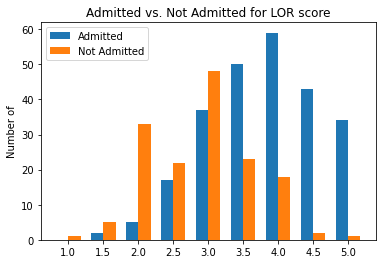

In [43]:
lor = data['LOR'].unique()
lor.sort()
admitted = []
not_adm = []

for x in lor:
  admitted.append(len(data[(data['LOR'] == x) & (data['Admitted'] == 1)]))
  not_adm.append(len(data[(data['LOR'] == x) & (data['Admitted'] == 0)]))

N = len(lor)
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)

rect1 = ax.bar(ind,admitted,width,label='Admitted')
rect2 = ax.bar(ind+width,not_adm,width,label='Not Admitted')

ax.set_ylabel('Number of')
ax.set_title('Admitted vs. Not Admitted for LOR score')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sop)

ax.legend( (rects1[0], rects2[0]), ('Admitted', 'Not Admitted') )

plt.show()



### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

Text(0.5, 1.0, 'GRE vs. TOEFL Admissions')

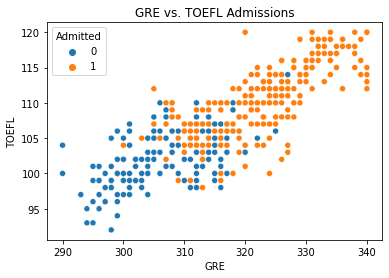

In [46]:
sns.scatterplot(x='GRE', y='TOEFL',data=data,hue='Admitted')
plt.title('GRE vs. TOEFL Admissions')

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

Text(0.5, 1.0, 'GPA vs. TOEFL Admissions')

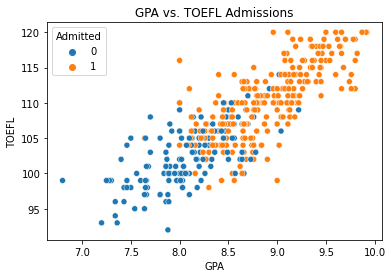

In [47]:
sns.scatterplot(x='GPA', y='TOEFL',data=data,hue='Admitted')
plt.title('GPA vs. TOEFL Admissions')

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

Text(0.5, 1.0, 'GRE vs. GPA Admissions')

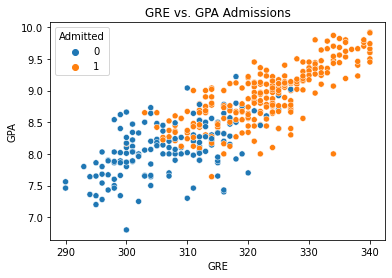

In [48]:
sns.scatterplot(x='GRE', y='GPA',data=data,hue='Admitted')
plt.title('GRE vs. GPA Admissions')

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [49]:
from sklearn.model_selection import train_test_split
y = data['Admitted']
X = data.drop('Admitted',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)
print('Training score: ', svc.score(X_train,y_train))
print('Testing score: ', svc.score(X_test,y_test))

Training score:  0.875
Testing score:  0.875


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_train,svc.predict(X_train)))
#Training data

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       126
           1       0.90      0.89      0.90       194

    accuracy                           0.88       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.88      0.88      0.88       320



In [55]:
print(classification_report(y_test,svc.predict(X_test)))
#Testing data

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.92      0.89      0.90        53

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80

